<a href="https://colab.research.google.com/github/madysonic/scRNAseqtutorial/blob/main/bootstrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
data <- c(5,7,9,10,11)
n_iterations = 1000
bootstrap_means <- numeric(n_iterations)
set.seed(42)
for (i in 1:n_iterations) {
  bootstrap_sample <- sample(data,size = length(data), replace = TRUE)
  bootstrap_means[i] <- mean(bootstrap_sample)
}

lower = quantile(bootstrap_means, 0.025)
upper = quantile(bootstrap_means, 0.975)

cat("Boostrap 95% CI for the mean:", lower, upper) # 95% of observations is between them

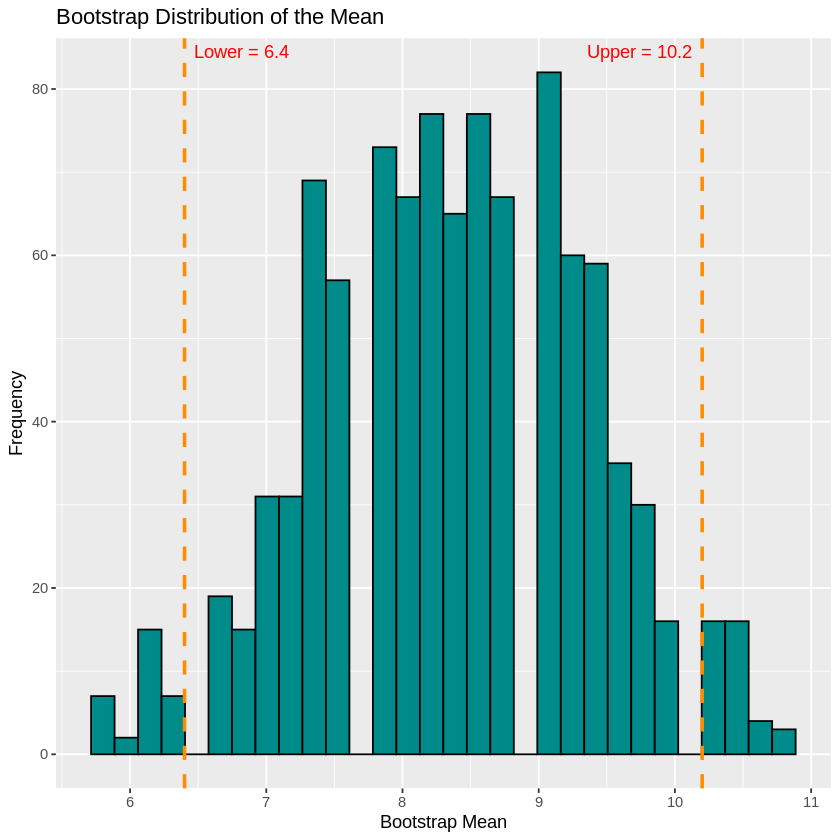

In [ ]:
library(ggplot2)
df <- data.frame(bootstrap_means = bootstrap_means)

ggplot(df, aes(x = bootstrap_means)) +
  geom_histogram(bins = 30, fill = "darkcyan", color = "black") +
  geom_vline(xintercept = lower, color = "darkorange", linetype = "dashed", size = 1) +
  geom_vline(xintercept = upper, color = "darkorange", linetype = "dashed", size = 1) +
  labs(
    title = "Bootstrap Distribution of the Mean",
    x = "Bootstrap Mean",
    y = "Frequency"
  ) +
  annotate("text", x = lower, y = Inf, label = paste0("Lower = ", round(lower,2)),
           vjust = 1.5, hjust = -0.1, color = "red") +
  annotate("text", x = upper, y = Inf, label = paste0("Upper = ", round(upper,2)),
           vjust = 1.5, hjust = 1.1, color = "red")

In [ ]:
group1 <- c(5,7,8)
group2 <- c(6,9,10)
obs_diff <- mean(group1) - mean(group2)

combined <- c(group1, group2)
n <- length(group1)

n_perm <- 1000
perm_diff <- numeric(n_perm)

set.seed(42)
for (i in 1:n_perm) {
    perm <- sample(combined)
    perm_diff[i] <- mean(perm[1:n]) - mean(perm[(n+1):length(perm)])
}

p_val <- mean(abs(perm_diff) >= abs(obs_diff))

cat("Observed", obs_diff, "\n")
cat("P Value", p_val)

Observed -1.666667 
P Value 0.397

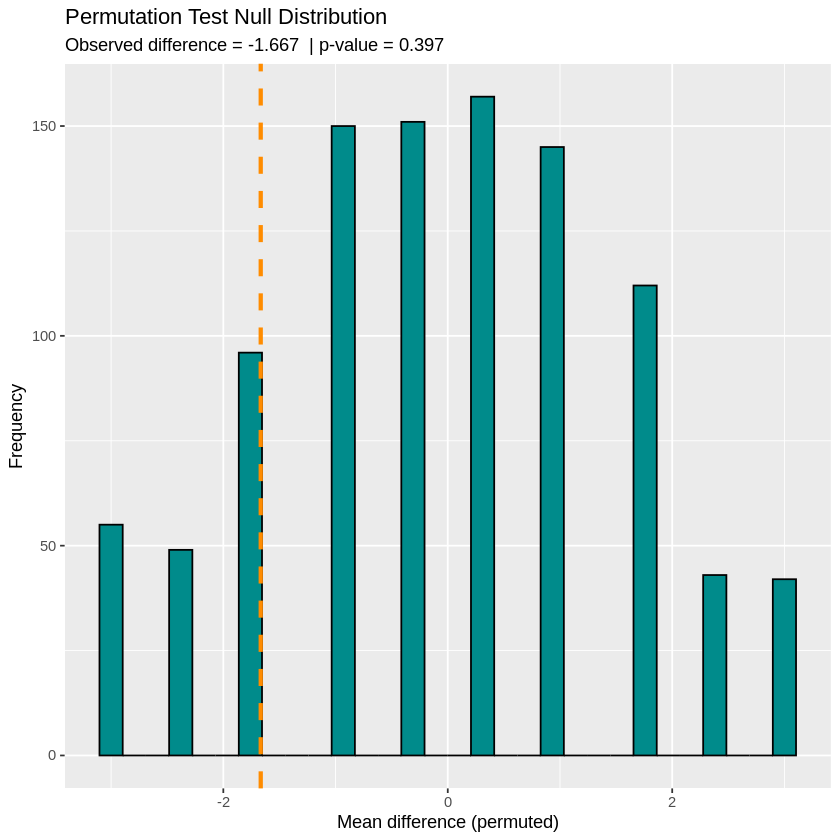

In [ ]:
df <- data.frame(perm_diff = perm_diff)

ggplot(df, aes(x = perm_diff)) +
  geom_histogram(bins = 30, fill = "darkcyan", color = "black") +
  geom_vline(xintercept = obs_diff,
             color = "darkorange", size = 1.2, linetype = "dashed") +
  labs(
    title = "Permutation Test Null Distribution",
    subtitle = paste("Observed difference =", round(obs_diff, 3),
                     " | p-value =", round(p_val, 3)),
    x = "Mean difference (permuted)",
    y = "Frequency"
  )

np.float64(8.399999999999999)